<a href="https://colab.research.google.com/github/Mounika-Alwar/ML-Practice/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train an SVM classifier on make_moons dataset.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
X,y = make_moons(n_samples=300,noise=0.25,random_state=45)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [22]:
linear_svm = SVC(kernel='linear',C=1.0)
linear_svm.fit(X_train,y_train)
y_pred_linear = linear_svm.predict(X_test)

In [23]:
print(accuracy_score(y_test,y_pred_linear))

0.8444444444444444


# Decision Boundary of Linear SVM

In [24]:
def plot_decision_boundary(model,X,y,title):
  x_min,x_max = X[:,0].min()-0.5,X[:,0].max()+0.5
  y_min,y_max = X[:,1].min()-0.5,X[:,1].max()+0.5
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,300),
                      np.linspace(y_min,y_max,300))
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.3)
  plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm,edgecolors='k')
  plt.title(title)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()

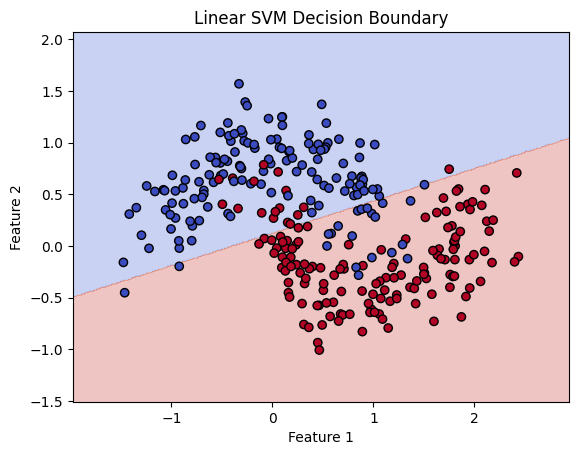

In [25]:
plot_decision_boundary(linear_svm, X, y, "Linear SVM Decision Boundary")

# SVM with RBF

In [26]:
rbf_svm = SVC(kernel='rbf',C=10,gamma='scale')
rbf_svm.fit(X_train,y_train)
y_pred_rbf = rbf_svm.predict(X_test)

In [27]:
print(accuracy_score(y_test,y_pred_rbf))

0.9333333333333333


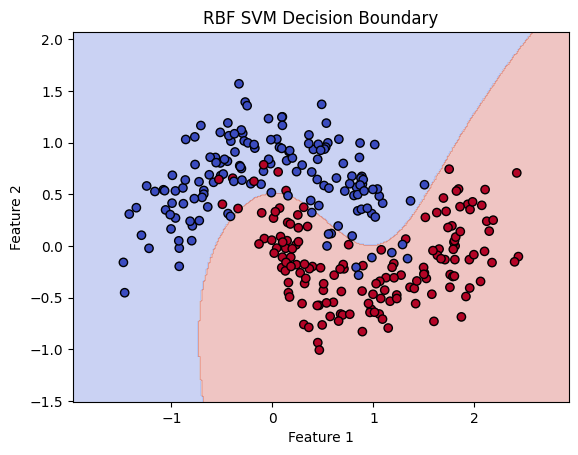

In [28]:
plot_decision_boundary(rbf_svm,X,y,"RBF SVM Decision Boundary")

# Hyperparameter tuning for RBF

In [29]:
param_grid = {
    'C':[0.1,1,10,100],
    'gamma':[0.01,0.1,1,10]
}
grid = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]})

In [30]:
best_rbf = grid.best_estimator_

In [31]:
y_pred_best = best_rbf.predict(X_test)

In [32]:
print(accuracy_score(y_test,y_pred_best))

0.9222222222222223


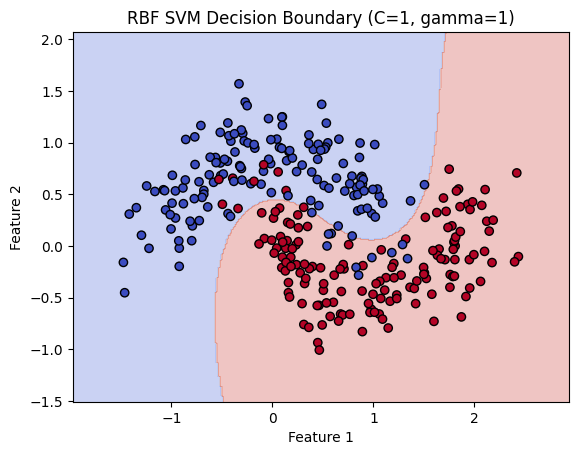

In [33]:
plot_decision_boundary(best_rbf, X, y, f"RBF SVM Decision Boundary (C={grid.best_params_['C']}, gamma={grid.best_params_['gamma']})")